In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow

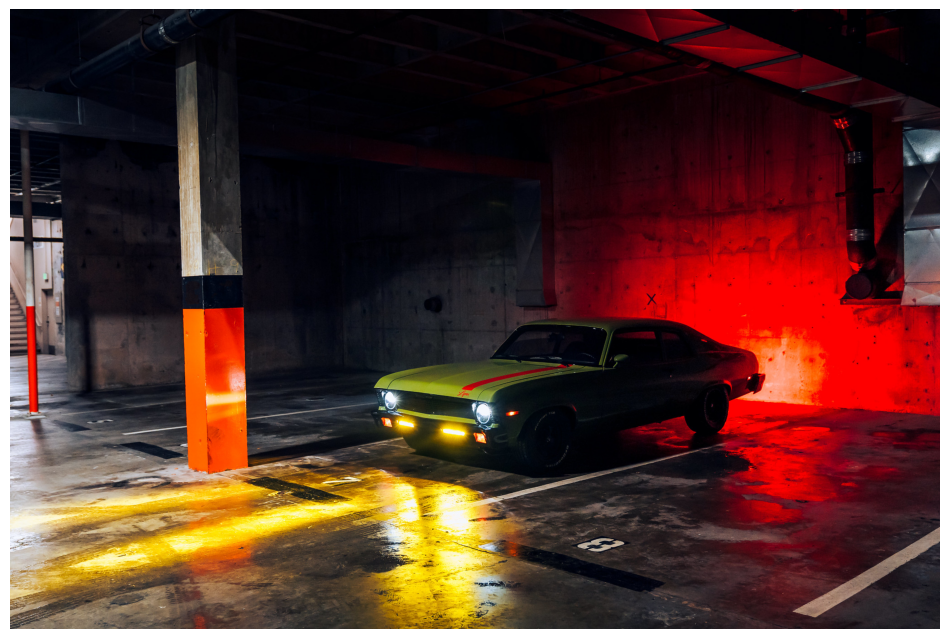

In [3]:
image = img.imread('dodge.jpg')

plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(image)

# ***NEGATIVE IMAGE*** 

In [4]:
img_bgr = cv2.imread('dodge.jpg')

In [5]:
height, width  , _ = img_bgr.shape


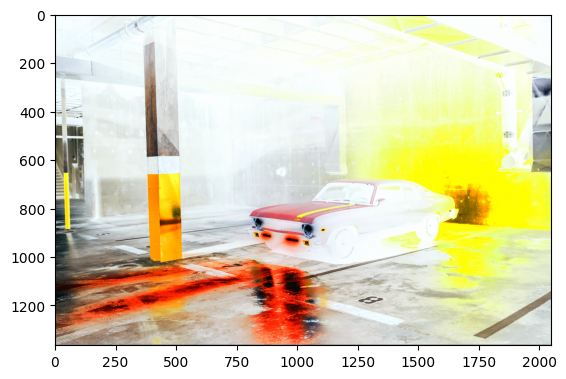

In [6]:
for i in range (0, height - 1):
    for j in range (0, width - 1):

        pixel = img_bgr[i, j]

        pixel [0] = 255 - pixel [0]
        pixel [1] = 255 - pixel [1]
        pixel [2] = 255 - pixel [2]

        img_bgr [i, j] = pixel


plt.imshow(img_bgr)
plt.show()

# ***GRAY LEVEL SLICING***

In [7]:
img_gray = cv2.imread('dodge.jpg', 0 )

In [8]:
def gray_level_slicing(img_gray, low_threshold, high_threshold):
    result = np.copy(img_gray)
    result[(img_gray >= low_threshold) & (img_gray <= high_threshold)] = 255
    result[(img_gray < low_threshold) | (img_gray > high_threshold)] = 0
    return result


In [9]:
sliced_img = gray_level_slicing(img_gray, 50, 150)

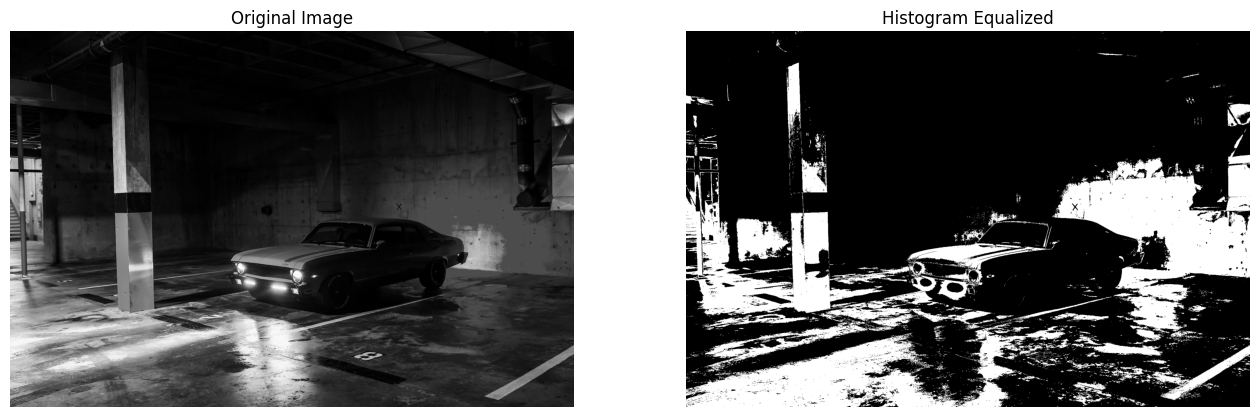


KeyboardInterrupt



In [ ]:
fig , axes = plt.subplots(1,2, figsize=(16, 16))

axes [0].imshow(img_gray, cmap='gray')
axes [0].set_title('Original Image')

axes [1].imshow(sliced_img, cmap='gray')
axes [1].set_title('Gray Level Sliced')

for ax in axes :
    ax.axis('off')

plt.show()

# ***HISTOGRAM EQUALIZATION***

In [11]:
img_gray = cv2.imread('dodge.jpg', 0 )

In [12]:
hist_equalized = cv2.equalizeHist(img_gray)

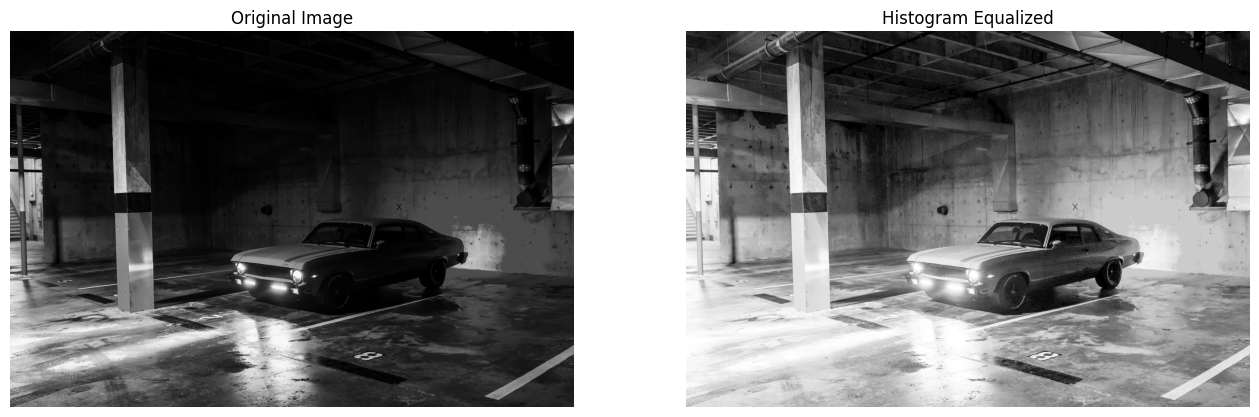

In [13]:
fig , axes = plt.subplots(1,2, figsize=(16, 16))

axes [0].imshow(img_gray, cmap='gray')
axes [0].set_title('Original Image')

axes [1].imshow(hist_equalized, cmap='gray')
axes [1].set_title('Histogram Equalized')

for ax in axes :
    ax.axis('off')

plt.show()


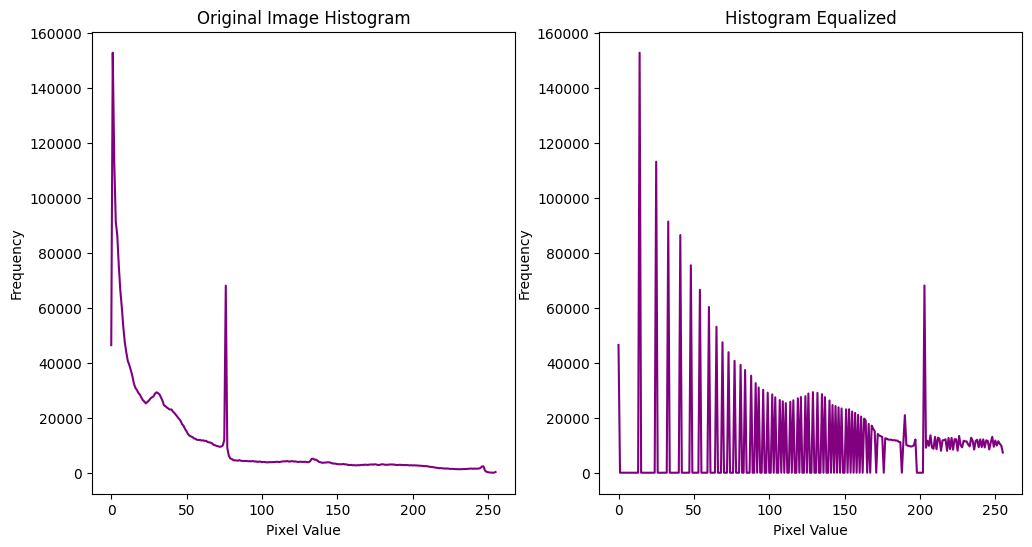

In [14]:

hist = cv2.calcHist([img_gray], [0], None, [256], [0,256])
hist2 = cv2.calcHist([hist_equalized], [0], None, [256], [0,256])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(hist, color='purple')
axes[0].set_title('Original Image Histogram')

axes[1].plot(hist2, color='purple')
axes[1].set_title('Histogram Equalized')

for ax in axes:
    ax.set_xlabel('Pixel Value')
    ax.set_ylabel('Frequency')

plt.show()

# ***QUESTION 2***

## ***GAUSSIAN BLUR***

In [15]:

mean = 0
var = 100
sigma = var ** 0.9
row, col, ch = image.shape
gauss = np.random.normal(mean, sigma, (row, col, ch))
gauss = gauss.reshape(row, col, ch)
noisy_image = image + gauss


noisy_image = np.clip(noisy_image, 0, 255)

noisy_image = np.uint8(noisy_image)


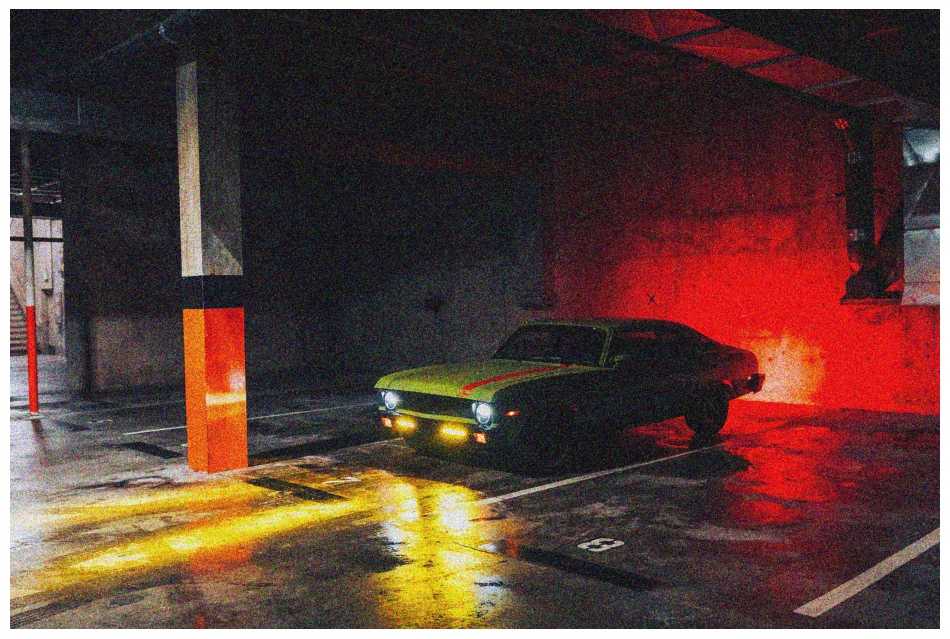

In [16]:
plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(noisy_image)
plt.show()

In [17]:
kernel_size = (15,15)
gaussian_blur = cv2.GaussianBlur(noisy_image, kernel_size, 0)

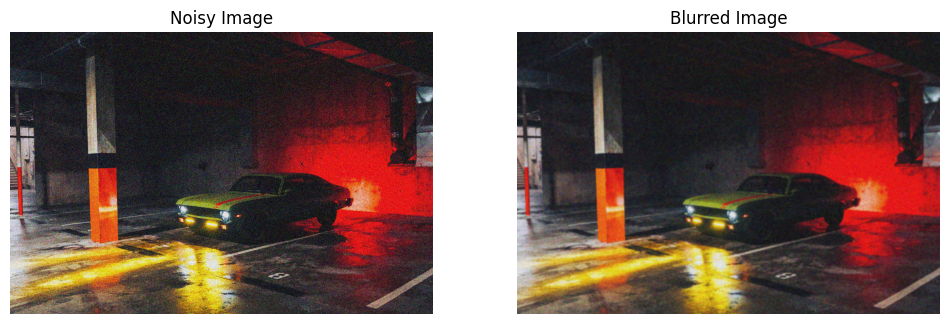

In [18]:
plt.figure(figsize=(12,10))

plt.subplot(1,2,1)
plt.title("Noisy Image")
plt.axis('off')
plt.imshow(noisy_image, cmap='gray')

plt.subplot(1,2,2)
plt.title("Blurred Image")
plt.axis('off')
plt.imshow(gaussian_blur, cmap='gray')

plt.show()

## ***LAPLACIAN FILTER***

In [21]:
lap = cv2.Laplacian(img_gray, cv2.CV_64F)
laplacian = np.uint8(np.absolute(lap))

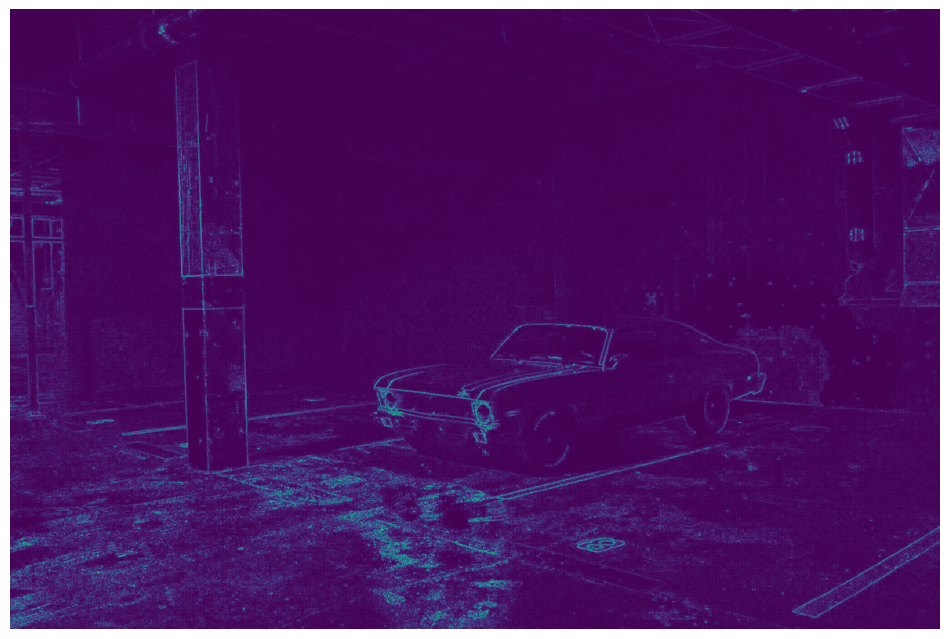

In [23]:
plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(laplacian)